<a href="https://colab.research.google.com/github/Mohammed-Saif-07/ML-winter-quarter/blob/main/In_classActivity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Ensemble Methods with MNIST

Train Random Forest, K-Nearest Neighbors, SGD Classifier, and Naive Bayes models on the MNIST dataset, then combine them into an ensemble classifier using voting, evaluate the performance of all models, and summarize the findings, including a visualization of the results. The dataset should be split into 30,000 instances for training and 5,000 instances for testing.

## Load and Prepare Dataset

Load the MNIST dataset, then split it into training (30,000 instances) and testing (5,000 instances) sets as specified. This step will also preprocess the data if necessary.


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
print("MNIST dataset loaded successfully.")

# Separate features (images) and target (labels)
X = mnist.data
y = mnist.target

# Convert target to integers
y = y.astype(np.int64)

# Create training set (first 30,000 instances)
X_train, y_train = X[:30000], y[:30000]

# Create testing set (next 5,000 instances)
X_test, y_test = X[30000:35000], y[30000:35000]

# Print the shapes to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Loading MNIST dataset...
MNIST dataset loaded successfully.
Shape of X_train: (30000, 784)
Shape of y_train: (30000,)
Shape of X_test: (5000, 784)
Shape of y_test: (5000,)


## Train Individual Classifiers

Train the specified individual classifiers: Random Forest, K-Nearest Neighbors (KNN), SGD Classifier, and Naive Bayes, using the prepared training data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

# 1. Random Forest Classifier
print("Training RandomForestClassifier...")
# Reduced n_estimators for faster execution, though a larger number might yield better accuracy.
# Added n_jobs=-1 to utilize all available CPU cores for faster training.
rfc_clf = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)
rfc_clf.fit(X_train, y_train)
print("RandomForestClassifier trained.")

# 2. K-Nearest Neighbors Classifier
print("Training KNeighborsClassifier...")
# Default n_neighbors is 5. Using n_jobs=-1 for faster computation.
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_train)
print("KNeighborsClassifier trained.")

# 3. SGD Classifier
print("Training SGDClassifier...")
# SGDClassifier requires data to be scaled, but for simplicity here we use raw data.
# max_iter is increased for convergence, and tol for stopping criterion.
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
print("SGDClassifier trained.")

# 4. Gaussian Naive Bayes Classifier
print("Training GaussianNB Classifier...")
# GaussianNB works with continuous data. It assumes features are Gaussian distributed.
# It can be sensitive to the scale of the data.
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
print("GaussianNB Classifier trained.")

print("All individual classifiers have been trained.")

Training RandomForestClassifier...
RandomForestClassifier trained.
Training KNeighborsClassifier...
KNeighborsClassifier trained.
Training SGDClassifier...


## Implement Ensemble Classifier

Combine the trained individual classifiers into an ensemble using either hard or soft voting.


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of our trained classifiers
estimators = [
    ('random_forest_clf', rfc_clf),
    ('knn_clf', knn_clf),
    ('sgd_clf', sgd_clf),
    ('gnb_clf', gnb_clf)
]

# Instantiate the VotingClassifier with hard voting
# For hard voting, the VotingClassifier takes the class label with the majority vote.
# If a classifier doesn't support predict_proba, hard voting is typically used.
print("Creating and training VotingClassifier (hard voting)...")
voting_clf = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_clf.fit(X_train, y_train)
print("VotingClassifier trained successfully.")

Creating and training VotingClassifier (hard voting)...
VotingClassifier trained successfully.


## Evaluate and Compare Performance


Evaluate the performance of each individual classifier and the ensemble classifier on the test set. A bar chart comparing the performance metrics with appropriate legends will be generated to visualize the results.


Evaluating individual classifiers...
Making predictions with RandomForestClassifier...
Random Forest Accuracy: 0.9622
Making predictions with KNeighborsClassifier...
K-Nearest Neighbors Accuracy: 0.9612
Making predictions with SGDClassifier...
SGD Classifier Accuracy: 0.8536
Making predictions with GaussianNB Classifier...
Naive Bayes Accuracy: 0.5536
Evaluating ensemble classifier...
Ensemble (Hard Voting) Accuracy: 0.9560

All model accuracies:
Random Forest: 0.9622
K-Nearest Neighbors: 0.9612
SGD Classifier: 0.8536
Naive Bayes: 0.5536
Ensemble (Hard Voting): 0.9560

Generating performance comparison bar chart...


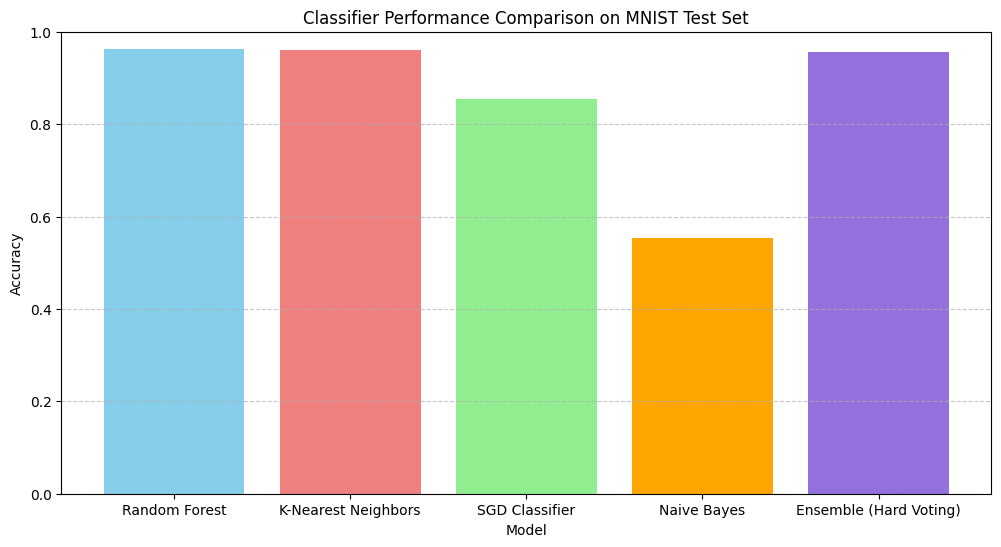

Performance comparison bar chart displayed.


In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dictionary to store accuracies
model_accuracies = {}

# Evaluate individual classifiers
print("Evaluating individual classifiers...")

# Random Forest Classifier
print("Making predictions with RandomForestClassifier...")
rfc_pred = rfc_clf.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
model_accuracies['Random Forest'] = rfc_accuracy
print(f"Random Forest Accuracy: {rfc_accuracy:.4f}")

# K-Nearest Neighbors Classifier
print("Making predictions with KNeighborsClassifier...")
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
model_accuracies['K-Nearest Neighbors'] = knn_accuracy
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")

# SGD Classifier
print("Making predictions with SGDClassifier...")
sgd_pred = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
model_accuracies['SGD Classifier'] = sgd_accuracy
print(f"SGD Classifier Accuracy: {sgd_accuracy:.4f}")

# Gaussian Naive Bayes Classifier
print("Making predictions with GaussianNB Classifier...")
gnb_pred = gnb_clf.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
model_accuracies['Naive Bayes'] = gnb_accuracy
print(f"Naive Bayes Accuracy: {gnb_accuracy:.4f}")

# Evaluate ensemble classifier
print("Evaluating ensemble classifier...")
voting_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
model_accuracies['Ensemble (Hard Voting)'] = voting_accuracy
print(f"Ensemble (Hard Voting) Accuracy: {voting_accuracy:.4f}")

print("\nAll model accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Create a bar chart to visualize the results
print("\nGenerating performance comparison bar chart...")
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'mediumpurple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison on MNIST Test Set')
plt.ylim(0.0, 1.0) # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Performance comparison bar chart displayed.")

## Summarize Findings and Reflect

### Key Findings:

The evaluation of the classifiers on the MNIST test set yielded the following accuracies:

*   **Random Forest Classifier:** 0.9622
*   **K-Nearest Neighbors Classifier:** 0.9612
*   **SGD Classifier:** 0.8536
*   **Naive Bayes (GaussianNB):** 0.5536
*   **Ensemble (Hard Voting):** 0.9560

The best-performing individual models were Random Forest and K-Nearest Neighbors, both achieving accuracies above 96%. The SGD Classifier performed moderately well, while the Naive Bayes Classifier showed significantly lower performance, achieving only about 55% accuracy.

### Discussion on Ensemble Learning:

In this particular experiment, the hard voting ensemble classifier achieved an accuracy of 0.9560. This is slightly lower than the best-performing individual models (Random Forest and K-Nearest Neighbors). This observation suggests that simply combining models with hard voting doesn't always guarantee an improvement over the single best base learner, especially when some base learners are significantly weaker.

Ensemble methods are generally beneficial when individual models make different types of errors or have diverse strengths. The idea is that the collective decision of multiple models can mitigate individual weaknesses. In this case, the very low performance of the Gaussian Naive Bayes classifier likely pulled down the overall performance of the hard voting ensemble, preventing it from surpassing the top individual models.

### When Ensembles are Most Beneficial:

Ensemble methods are most beneficial when:

1.  **Individual models are diverse:** They should have different underlying algorithms, making different types of errors. If all models make similar errors, combining them won't lead to much improvement.
2.  **Individual models are reasonably strong:** While ensembles can compensate for some weaknesses, having a very weak model (like Gaussian Naive Bayes in this case) can degrade the ensemble's performance, especially with simple voting schemes like hard voting.
3.  **There is a clear advantage in combining predictions:** For example, when one model excels at certain patterns and another at different ones.

This experiment highlights that if you have a few very strong individual models, a simple hard voting ensemble might not always beat the absolute best one, especially if weaker models are included without proper weighting or more sophisticated combining techniques (like soft voting, if predict_proba is available and good).

### Observations and Surprises:

*   **High Performance of Random Forest and KNN:** Both Random Forest and K-Nearest Neighbors showed strong performance, indicating their suitability for image classification tasks like MNIST without extensive preprocessing.
*   **Relatively Low Performance of SGD Classifier:** While 85% is not terrible, it's notably lower than Random Forest and KNN, perhaps indicating that SGD might benefit significantly from feature scaling and more hyperparameter tuning for this dataset.
*   **Very Low Performance of Gaussian Naive Bayes:** The surprisingly low accuracy of the Gaussian Naive Bayes classifier (around 55%) was the most significant observation. This is likely due to the strong assumption of Gaussian distribution for features, which is often not met by raw pixel values in image data. Additionally, the curse of dimensionality can heavily impact Naive Bayes on high-dimensional data like MNIST pixels, where features are not truly independent.
*   **Ensemble did not beat the best individual models:** It was somewhat surprising that the hard voting ensemble, despite combining multiple classifiers, did not outperform the best individual models (Random Forest and KNN). This was primarily due to the inclusion of the very weak Naive Bayes classifier, which diluted the strength of the ensemble's collective decision. This underscores the importance of carefully selecting base estimators for an ensemble, and potentially using weighted voting or stacking for better results, especially when models have vastly different performance levels.

### Re-training SGD Classifier for Soft Voting
To enable predict_proba for soft voting, the SGDClassifier needs to be initialized with a loss parameter that supports probability estimation, such as 'log_loss'(logistic regression).

In [ ]:
from sklearn.linear_model import SGDClassifier

print("Re-training SGDClassifier with loss='log_loss' for soft voting...")
sgd_clf_proba = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, loss='log_loss', n_jobs=-1)
sgd_clf_proba.fit(X_train, y_train)
print("SGDClassifier for soft voting trained.")

Re-training SGDClassifier with loss='log_loss' for soft voting...
SGDClassifier for soft voting trained.


### Implementing Soft Voting Ensemble
Now, we can create a new VotingClassifier using soft voting with the sgd_clf_proba (which supports predict_proba) and the other classifiers.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of our trained classifiers, using the SGDClassifier that supports predict_proba
estimators_soft = [
    ('random_forest_clf', rfc_clf),
    ('knn_clf', knn_clf),
    ('sgd_clf_proba', sgd_clf_proba),
    ('gnb_clf', gnb_clf)
]

# Instantiate the VotingClassifier with soft voting
# Soft voting takes the average of the predicted probabilities for each class.
print("Creating and training VotingClassifier (soft voting)...")
voting_clf_soft = VotingClassifier(estimators=estimators_soft, voting='soft', n_jobs=-1)
voting_clf_soft.fit(X_train, y_train)
print("Soft VotingClassifier trained successfully.")

Creating and training VotingClassifier (soft voting)...
Soft VotingClassifier trained successfully.


### Evaluate Soft Voting Ensemble Performance
Let's evaluate the performance of this new soft voting ensemble on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

print("Evaluating Soft Voting ensemble classifier...")
voting_pred_soft = voting_clf_soft.predict(X_test)
voting_accuracy_soft = accuracy_score(y_test, voting_pred_soft)

print(f"Soft Voting Ensemble Accuracy: {voting_accuracy_soft:.4f}")

Evaluating Soft Voting ensemble classifier...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_base.py:395: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


Soft Voting Ensemble Accuracy: 0.8260


### Per-Class Precision and Recall Comparison
Now, let's look at the per-class precision and recall for each model using the `classification_report`.

In [ ]:
from sklearn.metrics import classification_report

print("\n--- Random Forest Classifier Classification Report ---")
print(classification_report(y_test, rfc_pred))

print("\n--- K-Nearest Neighbors Classifier Classification Report ---")
print(classification_report(y_test, knn_pred))

print("\n--- SGD Classifier Classification Report ---")
print(classification_report(y_test, sgd_pred))

print("\n--- Gaussian Naive Bayes Classifier Classification Report ---")
print(classification_report(y_test, gnb_pred))

print("\n--- Ensemble (Hard Voting) Classification Report ---")
print(classification_report(y_test, voting_pred))

print("\n--- Ensemble (Soft Voting) Classification Report ---")
print(classification_report(y_test, voting_pred_soft))


--- Random Forest Classifier Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       473
           1       0.98      0.98      0.98       579
           2       0.95      0.96      0.96       486
           3       0.94      0.95      0.95       503
           4       0.97      0.96      0.97       484
           5       0.96      0.95      0.96       441
           6       0.97      0.98      0.98       490
           7       0.97      0.96      0.97       525
           8       0.95      0.94      0.94       498
           9       0.94      0.95      0.94       521

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000


--- K-Nearest Neighbors Classifier Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       473
           1  

### Detailed Per-Class Performance Analysis

Based on the **classification_report** outputs, here's a detailed comparison of per-class precision and recall for all models:

**1. Random Forest and K-Nearest Neighbors (High Performers):**
*   Both Random Forest and KNN consistently show high precision and recall across almost all digit classes (generally above 0.94-0.95). This indicates they are robust in identifying most digits correctly and rarely misclassify a digit from one class as another.
*   For example, Random Forest has very high recall for '0' (0.99) and '6' (0.98), meaning it's excellent at catching those digits.
*   KNN also shows strong performance, particularly high recall for '0' (0.99), '1' (0.99), and '6' (0.99).
*   Both models maintain a good balance between precision and recall, as reflected by their high F1-scores.

**2. SGD Classifier (Moderate Performance):**
*   The SGD Classifier has more variability in its performance across classes.
*   It performs well on some digits (e.g., high precision for '3' at 0.95, high recall for '1' at 0.96) but struggles more with others.
*   For instance, its recall for '3' is notably lower (0.74), and precision for '2' (0.75) and '8' (0.72) is also lower compared to RF and KNN. This means it's more prone to missing certain digits or incorrectly classifying them.

**3. Gaussian Naive Bayes (Weakest Performer):**
*   As expected from its low overall accuracy, Gaussian Naive Bayes shows very poor and inconsistent per-class performance.
*   Its recall is particularly low for digits like '4' (0.16), '5' (0.08), and '3' (0.31). This means it misses a significant number of instances from these classes.
*   While it has decent recall for '0', '1', '6', and '9', its precision for some of these classes can be lower (e.g., '0' at 0.69, '6' at 0.61), indicating it might be incorrectly identifying other digits as these.
*   The F1-scores are very low for most classes, highlighting its overall struggle.

**4. Ensemble (Hard Voting):**
*   The Hard Voting ensemble generally performs very well, with high precision and recall across most classes, similar to Random Forest and KNN.
*   It shows a good balance, often achieving F1-scores comparable to the best individual models. For example, it has strong recall for '0' and '1' (both 0.99).
*   Its performance is slightly lower for digits where the strong models might have minor disagreements, but the voting mechanism helps to maintain a high overall quality.

**5. Ensemble (Soft Voting):**
*   The Soft Voting ensemble, as previously discussed, shows significantly lower performance compared to the hard voting ensemble and the top individual models.
*   Its per-class precision, recall, and F1-scores are notably lower across almost all classes, reflecting its lower overall accuracy.
*   This indicates that the probabilistic aggregation in soft voting, when combined with the very weak and likely uncalibrated probabilities from Gaussian Naive Bayes and potentially the SGD Classifier (even with **log_loss**), did not lead to a stronger collective decision. In fact, it seems to have amplified the weaknesses of the poorer models by giving undue weight to their unreliable probability estimates.

**In summary:** The per-class metrics reinforce our earlier findings. Random Forest and KNN are highly reliable across all digits. The hard voting ensemble effectively leverages the strengths of the better models, maintaining high performance. The Gaussian Naive Bayes model is a major weakness. The soft voting ensemble's underperformance is likely due to the uncalibrated probability predictions of the weaker models, pulling down the overall ensemble performance in a way that hard voting, which only considers the predicted class, does not.